> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will explore the tmdb-movies data set where this data set contains information about 10,000 movies collected from "The Movie Database (TMDb)", including user ratings and revenue.
In this project we will try to answer the following questions:
1. what is the top 10 profitable movie among the list regarding to the 2010 conversion rate?
2. what is the best 10 horror movie in the data set?
3. Is there a relation between popularity and revenue?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as asplt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# We will laod the csv file into df1 dataframe
# then we will look into the dataframe information and sample
df1=pd.read_csv("tmdb-movies.csv")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
#### I found the following issues:
1. The release_date is object
2. Some of Budget values is zero while there is a value for revenue column (for the same entery) which will lead for wrong information.
#### Solution:
1. I will change the release_date type to be datetime instead of object
2. Since the budget and revenue can not be 0 we will repalce all 0s in revenue and budget columns with NAN

In [3]:
#At first we will change the release_date type to be datetime instead of object
df1.release_date = pd.to_datetime(df1.release_date)

#Since the budget and revenue can not be 0 we will repalce all 0s in revenue and budget columns with NAN 
df1.loc[df1.budget == 0, ['budget','revenue']] = np.nan, np.nan
df1.loc[df1.revenue == 0, ['budget','revenue']] = np.nan, np.nan
df1.loc[df1.budget_adj == 0, ['budget_adj', 'revenue_adj']] = np.nan, np.nan
df1.loc[df1.revenue_adj == 0, ['budget_adj', 'revenue_adj']] = np.nan, np.nan

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what is the top 10 profitable movie among the list regarding to the 2010 conversion rate?)

In [4]:
# In here we will find the top profitable movies
df1["profit"]=df1.revenue_adj-df1.budget_adj
df_profit=df1.sort_values(by=['profit'], ascending=False)[:10]

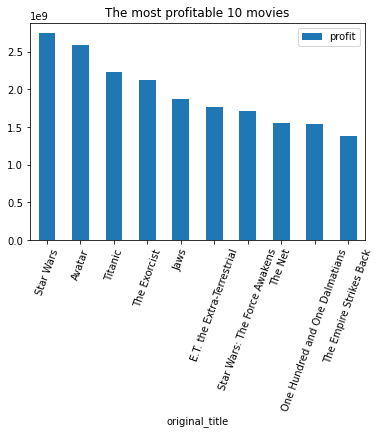

In [5]:
df_profit.plot.bar(x="original_title", y="profit", rot=70, title="The most profitable 10 movies");

### As it appears from the above graph The top profitable movies are:
1. Star Wars 
2. Avatar 
3. Titanic 
4. The Exorcist 
5. Jaws

### Research Question 2  (what is the best 10 horror movie in the data set?)

In [6]:
# In here we will find the top popular horror movies
df_horror=df1[df1['genres'].str.contains("Horror",na=False)]
df_horror=df_horror.sort_values(by=['popularity'], ascending=False)[:10]

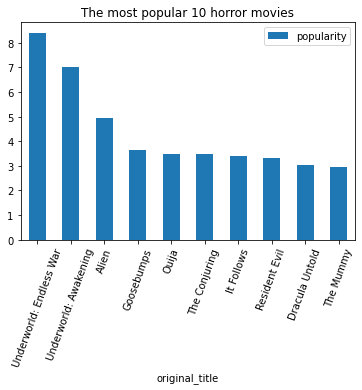

In [7]:
df_horror.plot.bar(x="original_title", y="popularity", rot=70, title="The most popular 10 horror movies");

### The top popular movies are 
1. Underworld: Endless War 
2. Underworld: Awakening 
3. Alien 
4. Goosebumps 
5. Ouija

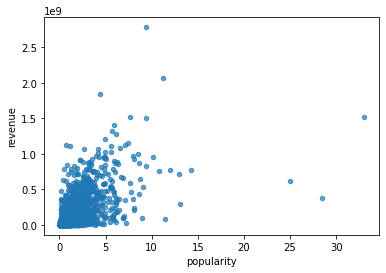

In [8]:
df1.plot(kind='scatter',x='popularity',y='revenue', alpha = 0.7)

### The Revenue of the movie is positively correlated with its Popularity

<a id='conclusions'></a>
## Conclusions

After Examining the data set we found what is the top profitable movie (star wars )and the top popular horror movie (Underworld: Endless War) and we check our assuamtion that the revenue is correlated ith the moview popularity.

### The limitations
The fist limitation I face is the missing values in the budget_adj and revenue_adj columns as some of them were have the value '0' which make me consider them all as N/A and this of course affect the result of the the 1st question.

The second limitation I wish there were much more details about the popularity column and how it was calculated to determine what it really mean and what other insights it may reflect

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!